# BoxCut for Clustering Data

This notebook is intended to show what and how the *BoxCut* class works.

*BoxCut* is used for dividing up a [symetrical sorted matrix](matrix_sorting.ipynb) into several "boxes".

The mean inside the box is different than the mean outside the box.

Each "box" is effectivly clusters elements into similar groups. 

An example might help.

### Imports

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
# global imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# local imports 
from boxcluster import BoxCut
from boxcluster.fake_data import generate_nested_data
from plotting import mplot

### Load Sample Data

To test out this function we load a sample dataset that contains the type of structures we are looking for.
The data is represented as a square 64 x 64 *numpy array* with values between 0 and 1.

In [17]:
sample_data = generate_nested_data(noise=0.05)
sample_data

array([[ 1.        ,  0.50548319,  0.63018906, ...,  0.28450994,
         0.3557521 ,  0.2906482 ],
       [ 0.50548319,  1.        ,  0.52478154, ...,  0.2426355 ,
         0.30024216,  0.30691947],
       [ 0.63018906,  0.52478154,  1.        , ...,  0.30004029,
         0.29366658,  0.35391643],
       ..., 
       [ 0.28450994,  0.2426355 ,  0.30004029, ...,  1.        ,
         0.63008612,  0.57920869],
       [ 0.3557521 ,  0.30024216,  0.29366658, ...,  0.63008612,
         1.        ,  0.59397085],
       [ 0.2906482 ,  0.30691947,  0.35391643, ...,  0.57920869,
         0.59397085,  1.        ]])

Here's a more visual way of representing the data.

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


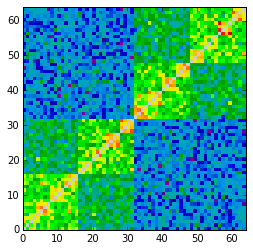

In [18]:
mplot(sample_data)

# BoxCut Example

The *BoxCut* class takes the *numpy array* as input and uses simulated annealing to find a set of "boxes" that best divide the data into "boxes". 

4


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


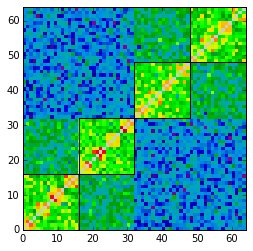

In [19]:
# initialize an instance of BoxCut using the sample data
bc = BoxCut(matrix=sample_data)

# run simulated annealing
best_boxes = bc(save_history=True)

# show the boxes
mplot(test_soln, boxes=best_boxes)

# Theory

### Number of Parameters (ie. $k$)

  $ k $ is the number of parameters. The set of parameters is 
 {$ n, b_2 , ... b_n , B_0 , A_0^1,  A_0^N $}
 
 - $n $, number of boxes
 
 - $b_2 $ , ... $b_n$ , number of break points
 
 - $B_0 $ , average values for the elements outside any boxes
 
 - $A_0^1$...$A_0^N $ , average values for the elements of the affinity matrix inside the boxes

So, the number of parameters is:

 $k = 1 + (n - 1) + 1 + n = 2 n + 1$
 
 $ k = 1 $ num of boxes $ + (n - 1) $ break-points $ + 1 $ outer box average (if there is any points out of box)  $ + n $ inner box averages

### Stop Criterion

 $ BIC = m \log{(\frac{L}{m})} + k \log(m) $
 
 - $k$ is the number of parameters.
 - $m$ is the total number of data points.
 - $L$ is the sum of squares error (ie. the likelyhood)
 
When comparing two sets of breakpoints, pick the one with the smaller $BIC$.

# Under The Hood


### Introspecting History

Because we ran **bc** using while saving history, `bc(save_history=True)`, we've got a list of namedtuples (from collections) that let us introspect how the simulated annealing algorithm ran. 

Each of the named tuple (called a *trace*) contains seven elements:
- evals (a counter)
- last_move (turns since move was accepted)
- move_accepted (boolean, some moves are stored but not accepted)
- temp (current temperature)
- current_fit (fitness/energy of current state)
- new_fit (fitness/energy of proposed move)

In [23]:
history = bc.history
history[:3]

[trace(evals=0, last_move=0, moves_this_temp=1, move_accepted=True, temp=0.001, current_fit=45.009892048282538, new_fit=44.965409879842269),
 trace(evals=1, last_move=0, moves_this_temp=2, move_accepted=True, temp=0.0009000000000000001, current_fit=44.965409879842269, new_fit=44.875631548786977),
 trace(evals=2, last_move=0, moves_this_temp=3, move_accepted=True, temp=0.0009000000000000001, current_fit=44.875631548786977, new_fit=44.772670316756702)]

This can conveniently turned into a dataframe and used for plotting

In [25]:
df = pd.DataFrame(history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,0,1,True,0.0010,45.009892,44.965410
1,0,2,True,0.0009,44.965410,44.875632
2,0,3,True,0.0009,44.875632,44.772670
3,0,4,True,0.0009,44.772670,44.729157
4,0,5,True,0.0009,44.729157,44.662314


### Minimizing Least Squares Error

We can check how well we minimizing this fitness function

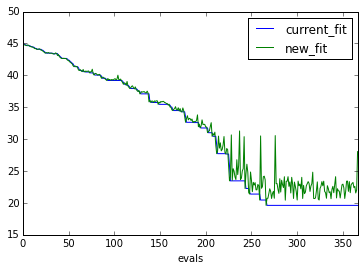

In [26]:
df[['current_fit', 'new_fit']].plot()

### Halting Condition

And check how far the algorithm is from stopping the optimization. 

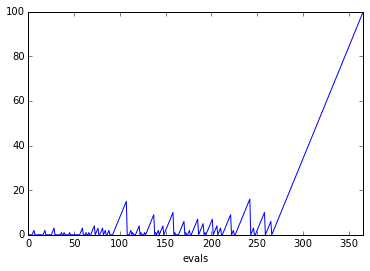

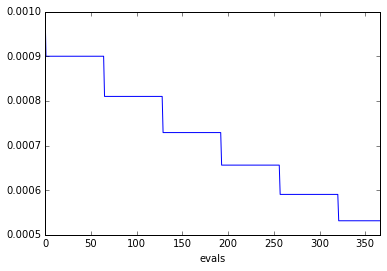

In [29]:
df['last_move'].plot()
plt.show()
df['temp'].plot()
plt.show()